In [1]:
from concurrent.futures import thread
import enum
import cv2
from cv2 import TM_SQDIFF
import numpy as np#数值计算工具包
import matplotlib.pyplot as plt
#模板匹配

img_1=cv2.imread(r'C:\Users\wangkai\Desktop\pythonwork\data\lenna.png')
img_2=cv2.imread(r'C:\Users\wangkai\Desktop\pythonwork\data\lenna_face.png')
h,w=img_2.shape[:2]


min_val:409552320.0  max_val:935052928.0  min_loc:(210, 192) max_loc:(295, 169)


(<AxesSubplot:title={'center':'img_1'}>,
 Text(0.5, 1.0, 'img_1'))

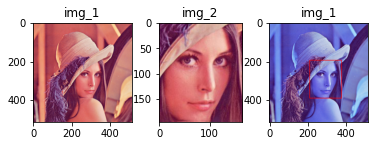

In [12]:

def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
img_1=cv2.imread(r'C:\Users\wangkai\Desktop\pythonwork\data\lenna.png')
img_2=cv2.imread(r'C:\Users\wangkai\Desktop\pythonwork\data\lenna_face.png')[:,:,::-1]
res=cv2.matchTemplate(img_1,img_2,TM_SQDIFF)

img1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.subplot(231),plt.imshow(img1, cmap = plt.cm.Spectral),plt.title('img_1') 

min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
print("min_val:%s  max_val:%s  min_loc:%s max_loc:%s"%(min_val,max_val,min_loc,max_loc))
top_left=min_loc
bottom_right=(top_left[0]+w,top_left[1]+h)
cv2.rectangle(img_1,top_left,bottom_right,255,2)
cv_show('res',img_1)



plt.subplot(232),plt.imshow(img_2,'brg'),plt.title('img_2') 
plt.subplot(233),plt.imshow(img_1,'brg'),plt.title('img_1') 

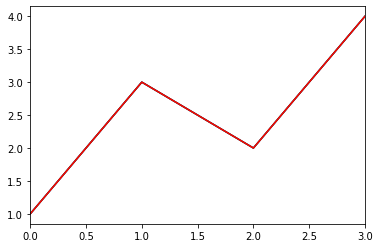

(<AxesSubplot:title={'center':'mask_img'}>,
 Text(0.5, 1.0, 'mask_img'))

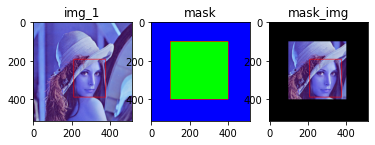

In [6]:

#直方图
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_1],[i],None,[256],[0,256])
    #print(histr)
    histr=[1,3,2,4]
    plt.plot(histr,color=col)#histr是一个列表   plt.plot([[3,4,5]],color=col)就是连接3，4，5一条线
    plt.xlim([0,3])
plt.show()

#mask
mask=np.zeros(img_1.shape[:2],np.uint8)
mask[100:400,100:400]=255
cv_show('mask',mask)
mask_img=cv2.bitwise_and(img_1,img_1,mask=mask)
cv_show('res',mask_img)

plt.subplot(231),plt.imshow(img_1,'brg'),plt.title('img_1') 
plt.subplot(232),plt.imshow(mask,'brg'),plt.title('mask') 
plt.subplot(233),plt.imshow(mask_img,'brg'),plt.title('mask_img') 

[162 162 162 ... 103 105 107]


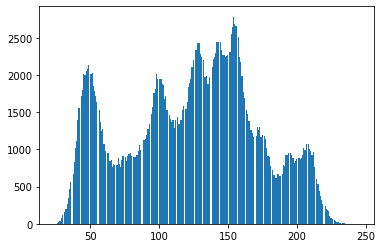

[[203 203 203 ... 212 186 128]
 [203 203 203 ... 212 186 128]
 [203 203 203 ... 212 186 128]
 ...
 [  9   9  22 ...  89  82  78]
 [ 10  10  31 ...  87  91  93]
 [ 10  10  31 ...  87  91  93]]


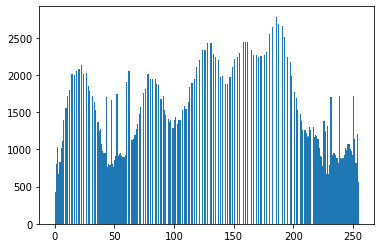

(<AxesSubplot:title={'center':'img'}>,
 Text(0.5, 1.0, 'img'))

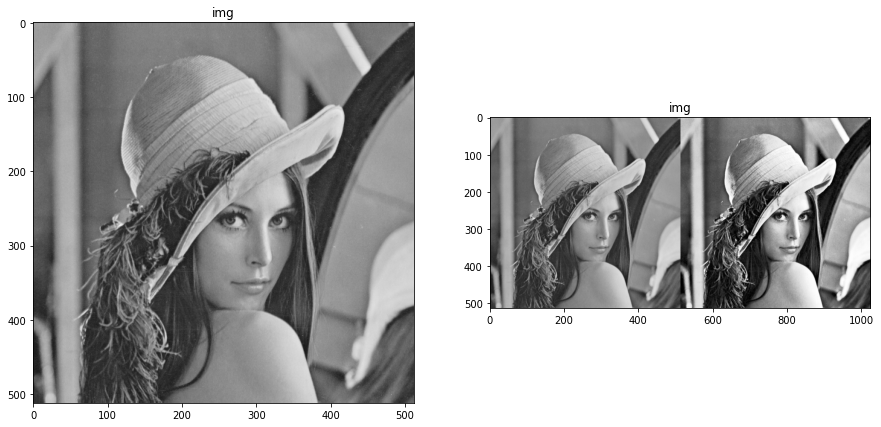

In [16]:

#均衡化
img_1=cv2.imread(r'C:\Users\wangkai\Desktop\pythonwork\data\lenna.png',0)
print(img_1.ravel())     #ravel把一个二维数组拉成了一维的数组!!!!!!!!!!!!!!
plt.hist(img_1.ravel(),256)
plt.show()

equ = cv2.equalizeHist(img_1)
print(equ)  
plt.hist(equ.ravel(),256)
plt.show()
res=np.hstack((img_1,equ))
cv_show('res',res)

plt.figure(figsize=(15,15))

img_1r= cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
res_r= cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img_1r,'brg',),plt.title('img')
plt.subplot(122),plt.imshow(res_r,'brg',),plt.title('img')
